In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import pandas as pd
import pickle

from helpers import *
from sklearn.cluster import KMeans

features = get_available_features()

with GBD([ '/home/raphael-zipperer/Uni/BA/database/base.db', '/home/raphael-zipperer/Uni/BA/database/meta.db' ]) as gbd:
    data = gbd.query('(track=main_2023 or track=main_2024) and minisat1m!=yes', resolve=features)
    data[features] = data[features].apply(pd.to_numeric)


df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

#data = data[data['hash'].isin(min_time_config['key'])]

epsilon = 1e-12
data[features] = (data[features] - data[features].mean()) / (data[features].std() + epsilon)


# Split the data into training and testing sets

# Initialize the RandomForestClassifier



# Calculate the accuracy of the model


# Define the range for k
k_range = range(1, 20)

# Dictionary to store the inertia for each k
inertia = {}

for i in range(50):
    data['index'] = -1
    data_train, data_test = train_test_split(data.copy(), test_size=0.2, random_state=42)

    # Perform k-means clustering for each k
    for k in k_range:
        print(k)

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_train[features])
        #inertia[k] = kmeans.inertia_

        # Assign the cluster labels to the data
        data_train['cluster'] = kmeans.labels_

        # Create a dataframe that assigns the cluster to the corresponding hash
        cluster_assignment = data_train[['hash', 'cluster']]

        # Get hashes for each cluster

        for cluster in range(k):
            cluster_hashes = cluster_assignment[cluster_assignment['cluster'] == cluster]['hash'].tolist()

            data_train.loc[data_train['hash'].isin(cluster_hashes), 'index'] = getBest(cluster_hashes)



        rf = RandomForestClassifier()

        rf.fit(data_train[features], data_train["index"])

        y_pred = rf.predict(data_test[features])

        #accuracy = accuracy_score(data_test["index"], y_pred)

        # Zip the data_test hashes and the predictions
        hash_prediction = pd.DataFrame(list(zip(data_test["hash"], y_pred)), columns=["hash", "predicted_index"])


        print(getDefault(data_test["hash"].tolist()))
        print(evalConfigPredict(hash_prediction))
        #print(f"Model Accuracy: {accuracy}")

    # Print the inertia for each k
    #print(inertia)


1


/tmp/ipykernel_21548/3805970247.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Default' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_train.loc[data_train['hash'].isin(cluster_hashes), 'index'] = getBest(cluster_hashes)


99418.37504506111
99418.37504506111
2
99418.37504506111
99418.37504506111
3
99418.37504506111
99418.37504506111
4
99418.37504506111
99418.37504506111
5
99418.37504506111
99341.27406263351
6
99418.37504506111
99142.6291422844
7
99418.37504506111
99142.6291422844
8
99418.37504506111
98844.39911985397
9
99418.37504506111
98798.83393883705
10
99418.37504506111
96985.4439394474
11
99418.37504506111
95997.35157322884
12
99418.37504506111
96985.4439394474
13
99418.37504506111
96347.19781112671
14
99418.37504506111
96371.0956325531
15
99418.37504506111
96601.13470244408
16
99418.37504506111
94405.86329007149
17
99418.37504506111
94353.65207624435
18
99418.37504506111
94532.12695932388
19
99418.37504506111
93933.94691514969
{1: 23829.734507545705, 2: 19758.48965003847, 3: 17511.599890188485, 4: 16755.549929507146, 5: 15022.873036229808, 6: 13475.516443331657, 7: 12539.198026240287, 8: 9714.217569541612, 9: 9063.885096107644, 10: 8148.48895136793, 11: 7179.398266612601, 12: 6854.315675467358, 13

In [ ]:
from helpers import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import pickle

n = 50
def kmeansnclusters(k, train):
    data_train = train.copy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_train[features])

    
    #inertia[k] = kmeans.inertia_

    # Create a dataframe that assigns the cluster to the corresponding hash
    #cluster_assignment = data_train[['hash', 'cluster']]
    cluster_assignment = pd.DataFrame(list(zip(data_train['hash'].tolist(), kmeans.labels_)), columns= ["hash", "cluster"])

        # Get hashes for each cluster

    for cluster in range(k):
        cluster_hashes = cluster_assignment[cluster_assignment['cluster'] == cluster]['hash'].tolist()

        data_train.loc[data_train['hash'].isin(cluster_hashes), 'index'] = getBest(cluster_hashes)
    #neighbors = NearestNeighbors(n_neighbors=1)
    #neighbors.fit(data_train[features])


    cluster_config= {}
    for cluster in set(kmeans.labels_):

        df = pd.read_csv('top40.csv')
        insts = cluster_assignment[cluster_assignment['cluster'] == cluster]['hash'].tolist()

        df = df[df['key'].isin(insts)]

        #df = df[df['configuration'].isin(configs)]
        df.loc[df['time'] >= 1800, 'time'] = 3600
        df = df.groupby('configuration')['time'].sum()

        best_config = df.idxmin()
        cluster_config[cluster] = best_config

    #cluster_config[-1] = 'Default'

    #rf = RandomForestClassifier()

    #rf.fit(data_train[features], data_train["index"])

    
    return kmeans, cluster_config


features = get_available_features()

with GBD([ '/home/raphael-zipperer/Uni/BA/database/base.db', '/home/raphael-zipperer/Uni/BA/database/meta.db' ]) as gbd:
    data = gbd.query('(track=main_2023 or track=main_2024) and minisat1m!=yes', resolve=features + ["family"])
    data[features] = data[features].apply(pd.to_numeric)


df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

# Replace family label with "rest" for small families, to make stratification possible
family_counts = data['family'].value_counts()
families_to_replace = family_counts[family_counts < 5].index
data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

epsilon = 1e-12
data[features] = (data[features] - data[features].mean()) / (data[features].std() + epsilon)


results = []


for i in range(8):
    print(i)
    part = genericClusterEval(data, lambda x : kmeansnclusters(2 ** i, x), 50)
    results.append(part)
    with open('clustsbscorrected/bin{}.pkl'.format(i), 'wb') as f:
        pickle.dump(part, f)

for i in range(25,45):
    print(i)
    part = genericClusterEval(data, lambda x : kmeansnclusters(i, x), 20)
    results.append(part)
    with open('clustsbscorrected/normal{}.pkl'.format(i), 'wb') as f:
        pickle.dump(part, f)





0
8
[[{'Default': 1280.7811143476713, 'Virtual': 1126.3639701259763, 'Eval': 1228.9882780595829}]]


In [14]:
with GBD([ '/home/raphael-zipperer/Uni/BA/database/base.db', '/home/raphael-zipperer/Uni/BA/database/meta.db' ]) as gbd:
    data = gbd.query('(track=main_2023 or track=main_2024) and minisat1m!=yes', resolve=features)
    data[features] = data[features].apply(pd.to_numeric)

df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

data = data[data['hash'].isin(min_time_config['key'])]

for i in range(50):
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=i)
    print(len(data_test))

122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122


In [6]:
import pickle

with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

10


/home/raphael-zipperer/Uni/BA/classifier/classifier/helpers.py:251: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


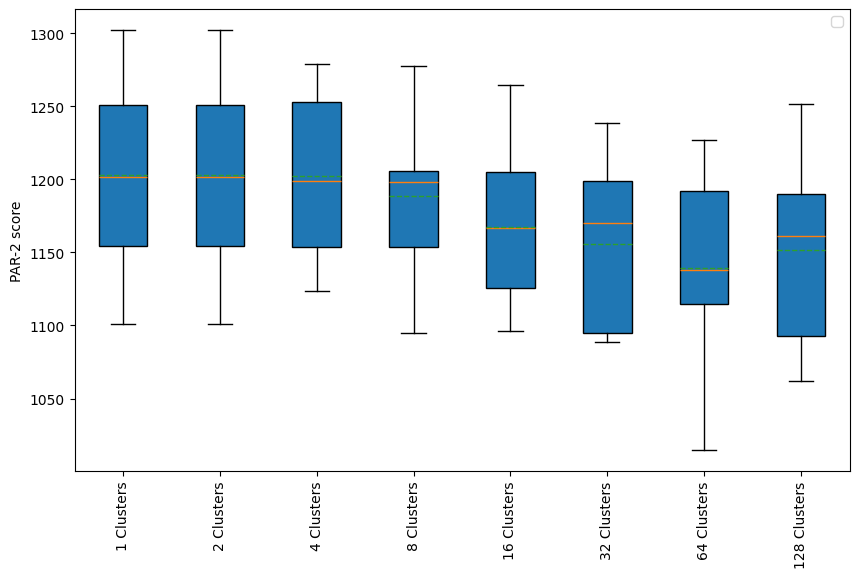

[1202.8876676468474, 1202.8876676468474, 1202.0982830659339, 1188.3678460723474, 1167.171184343727, 1156.0062084394067, 1139.663540963907, 1151.9353815764189]


In [3]:
import pickle
from helpers import *

loaded_results = []

for i in range(8):
    with open('clustsbscorrected/bin{}.pkl'.format(i), 'rb') as f:
        loaded_results.append(pickle.load(f))

loaded_results = [x[:10] for x in loaded_results]
print(len(loaded_results[0]))


print(compareModels(loaded_results, [str(2**i) + " Clusters" for i in range(8)], title=""))
#print(compareModels(loaded_results[10:18], [str(i) + " Clusters" for i in range(30,38)], title="", defvbs=True))
#print(compareModels(loaded_results[20:30], [str(i) + " Clusters" for i in range(21,31)]))
#print(compareModels(loaded_results[30:36], [str(i) + " Clusters" for i in range(31,41)]))